# Introduction to Logistic Regression

Section 4-4.1 of Introduction to Statistical Learning by Gareth James, et al.

### Background
- We want to learn about Logistic Regression as a method for __classification__.
- Some examples of classification problems:
    - Spam versus real emails (Fake / Real)
    - Loan Default (Yes / No)
    - Disease Diagnosis (Positive / Negative)
- All of the above are examples of Binary Classification 
- So far, we've only seen regression problems where we try to predict a continuous value, such as the price of a house or the grades on a test
- Althought the name may be confusing at first, logisitc regression allows us to solve classification problems where we are trying to predict discrete categories
- The convention for binary classification is to have two classes 0 and 1.

We can't use a normal linear regression model on a binary group. It won't lead to a good fit:


Call:
lm(formula = Binary ~ Number, data = binary)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7502 -0.4368  0.0000  0.4371  0.7497 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.488e-01  3.032e-02   8.205 7.08e-16 ***
Number      5.020e-04  5.247e-05   9.567  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.479 on 998 degrees of freedom
Multiple R-squared:  0.084,	Adjusted R-squared:  0.08308 
F-statistic: 91.52 on 1 and 998 DF,  p-value: < 2.2e-16


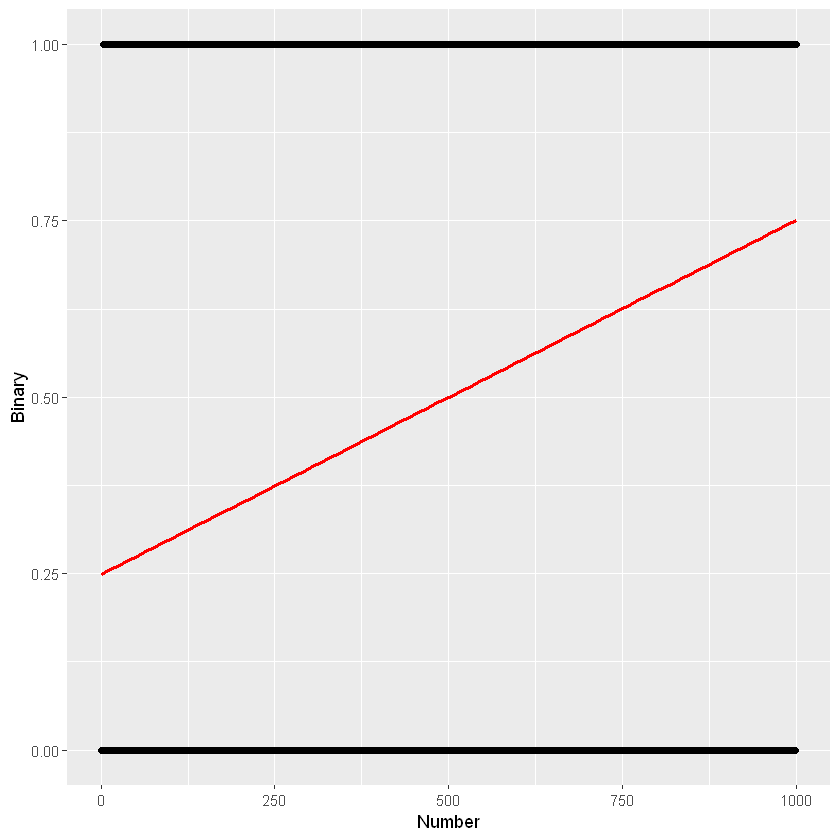

In [2]:
library(ggplot2)
library(dplyr)

binary <- read.csv("binary.csv")

pl <- ggplot(data= binary, aes(x=Number, y = Binary))+geom_point()
pl + geom_smooth(aes(group=1),method ='lm',formula = y~x,se=FALSE,color='red')
model <- lm( Binary ~ Number, binary )
summary(model)

### Sigmoid Function
The Sigmoid (aka Logistic) Function takes in any value and outputs it to be between 0 and 1.

$$ h_ \theta (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^- \theta^Tx }  $$ 


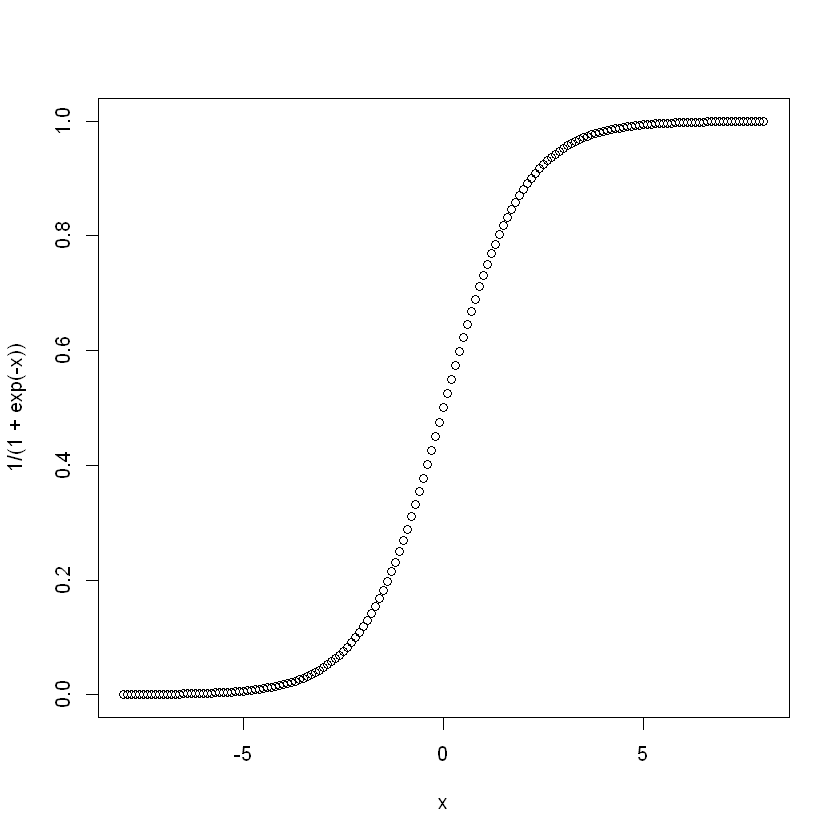

In [3]:
x <- seq(-8,8,0.1)
plot(x, 1/(1+exp(-x)))

- This means we can take our Linear Regression Solutions and place it into the Sigmoid Function
- This results in a probability from 0 to 1 of belinging in the 1 class
- We can set a cuttoff point at 0.5, anything below it results in class 0, anything above is class 1.

### Review
- We can use the logistic function to output a value ranging from 0 to 1. Based off of this probability, we can assign a class.

### Model Evaluation
- After you train a logistic regression model on some training data, you will evaluate your model's performance on some test data.
- You can use a confustion matrix to evaluate classification mdoels.
- For example, imagine testing for disease
- Test for presence of disease
    - NO = negative test = FALSE = 0
    - YES = postive test = TRUE = 1

##### Confusion Matrix
| `           | Predicted:  NO | Predicted: YES |     |   |
|-------------|:--------------:|:--------------:|-----|---|
|  Actual: NO | TN = 50        | FP = 10        | 60  |   |
| Actual: YES | FN = 5         | TP = 100       | 105 |   |
|             | 55             | 110            |     |   |

__Basic Terminology__
- True Positive (TP)
- True Negative (TN)
- False Positive (FP)
- False Negatives (FN)

#### Accurary:
Overall, how often is the model correct?

<img src="https://latex.codecogs.com/gif.latex?\frac{(TP&space;&plus;&space;TN&space;)}{Total}&space;=&space;150/165&space;=&space;0.91" title="\frac{(TP + TN )}{Total} = 150/160 = 0.91" /></a>

#### Misclassification Rate (Error Rate)
Overall, how often is it wrong?

<img src="https://latex.codecogs.com/gif.latex?\frac{(FP&space;&plus;&space;FN&space;)}{Total}&space;=&space;15/165&space;=&space;0.09" title="\frac{(FP + FN )}{Total} = 15/165 = 0.09" /></a>


#### Type I vs Type II Errors

<img src = "https://www.statisticssolutions.com/wp-content/uploads/2017/12/rachnovblog-768x310.jpg">

# Working with the Data
We will use the Titanic Dataset from Kaggle. THis is a very famous dataset and is very often a student's first step in machine learning! We'll be trying to predict a classification: survival 

Let's begin our understanding of implementing Logistic Regression in R for classification.

We'll use a "semi-cleaned" version of the titanic data set.

# The Data

We can begin by loading in the training data into a data frame

In [4]:
df.train <- read.csv("titanic_train.csv")

In [5]:
head(df.train)
str(df.train)
summary(df.train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

## Exploratory Data Analysis
It's always important to explore the data before jumping in head first. Let's see if we have any issues with NA values in our data. The 'Amelia' package can be used to help us visualize the missing values

In [7]:
# install.packages('Amelia')
library(Amelia)

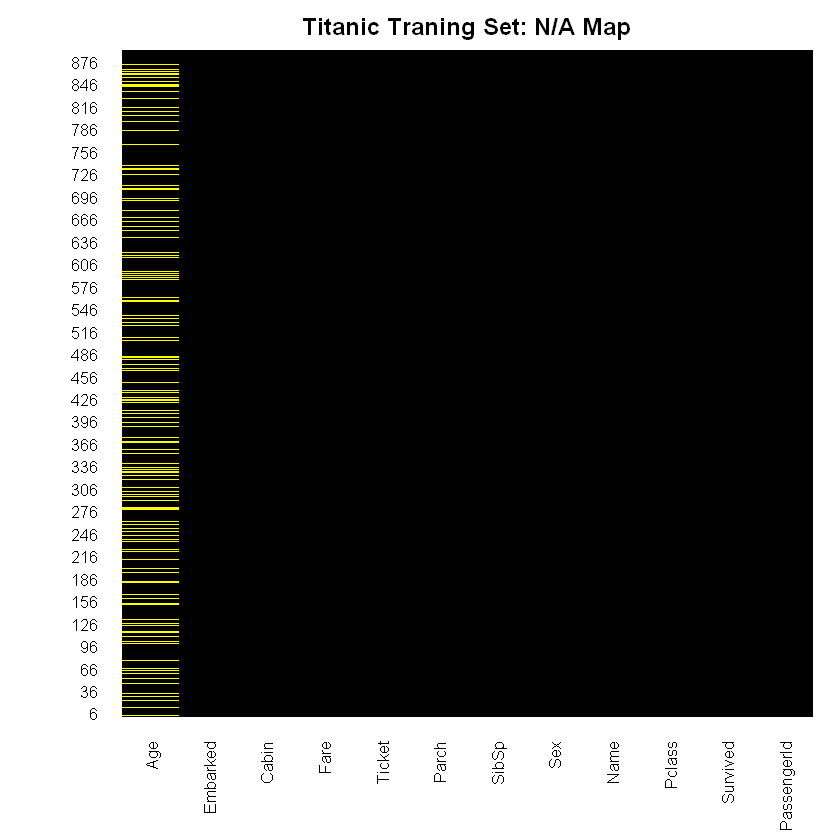

In [8]:
missmap(df.train,main= 'Titanic Traning Set: N/A Map',
        col = c('yellow','black'), legend = FALSE)

Roughly 20 percent of the "Age" data is missing. The proportion of Age "missings" is likely small enough for reasonable replacement with some form of __imputation.__ We will touch on that later

Let's continue on by visualizing some of the data.

## Data Visualization with ggplot2

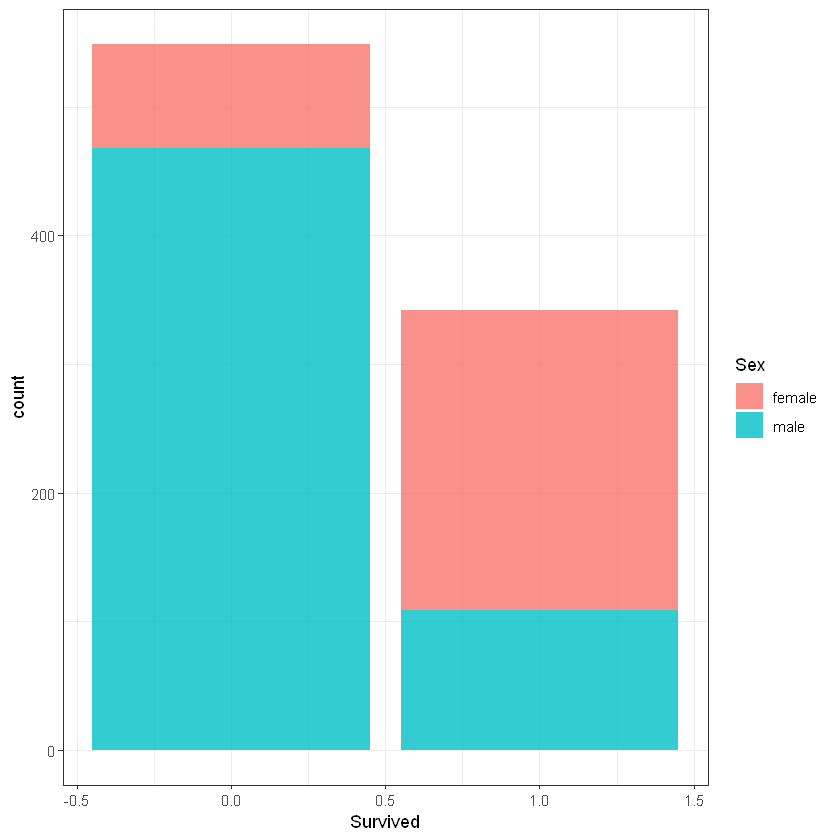

In [9]:
# Plotting the survivor ratio along with the sex of the passangers

ggplot(data = df.train, aes(Survived, fill = Sex)) + 
geom_bar( alpha = 0.8 ) + 
theme_bw()

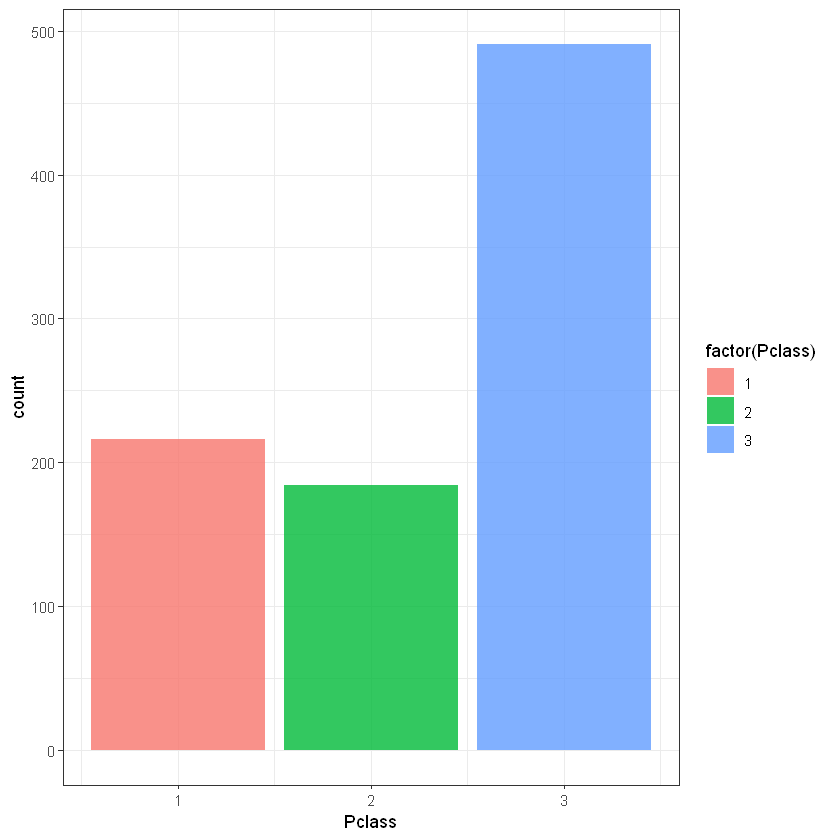

In [10]:
# Plotting the number of passangers by class

ggplot(df.train, aes(Pclass)) + 
geom_bar(aes(fill = factor(Pclass)) , alpha = 0.8) + 
theme_bw()

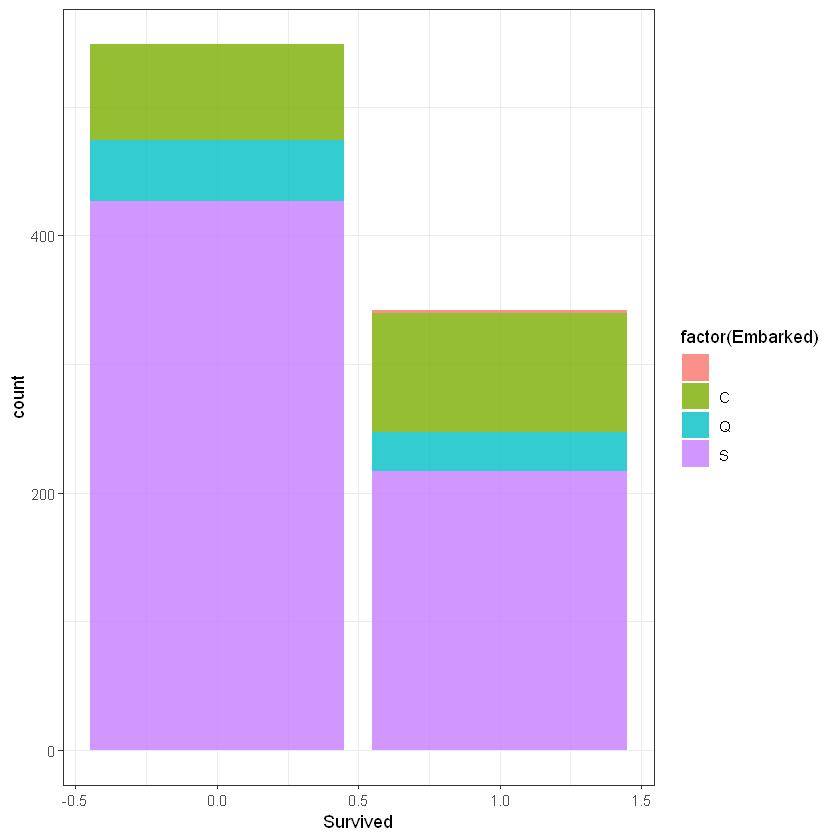

In [11]:
# Plotting the Survivors based on their embark location

ggplot(df.train, aes(Survived)) + 
geom_bar(aes(fill = factor(Embarked)), alpha = 0.8) + theme_bw()

Warning message:
"Removed 177 rows containing non-finite values (stat_bin)."

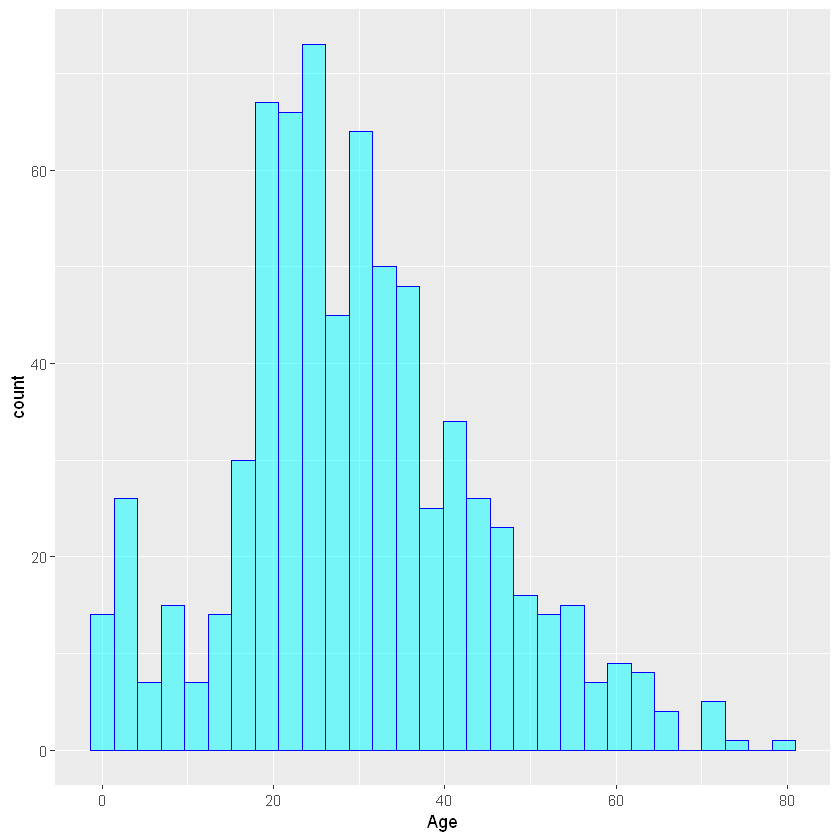

In [12]:
# Histogram of the age of the passangers

ggplot(df.train, aes(Age)) + 
geom_histogram(bins = 30, alpha = 0.5, color = 'blue', fill = 'cyan' )

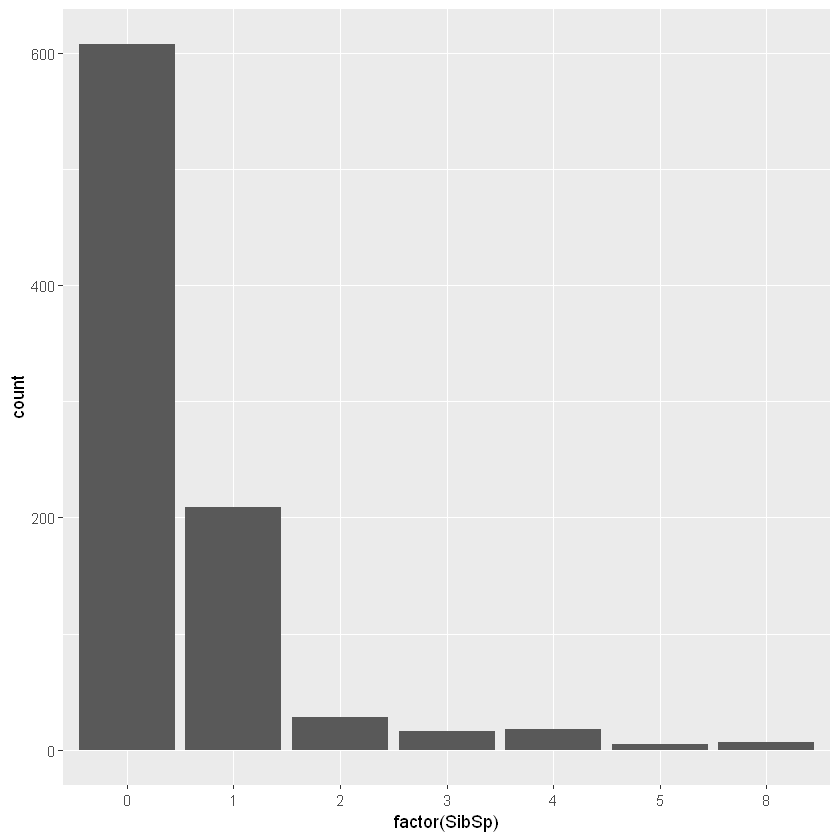

In [13]:
# Bar graph of the number of family
ggplot(df.train, aes(factor(SibSp)))+geom_bar()

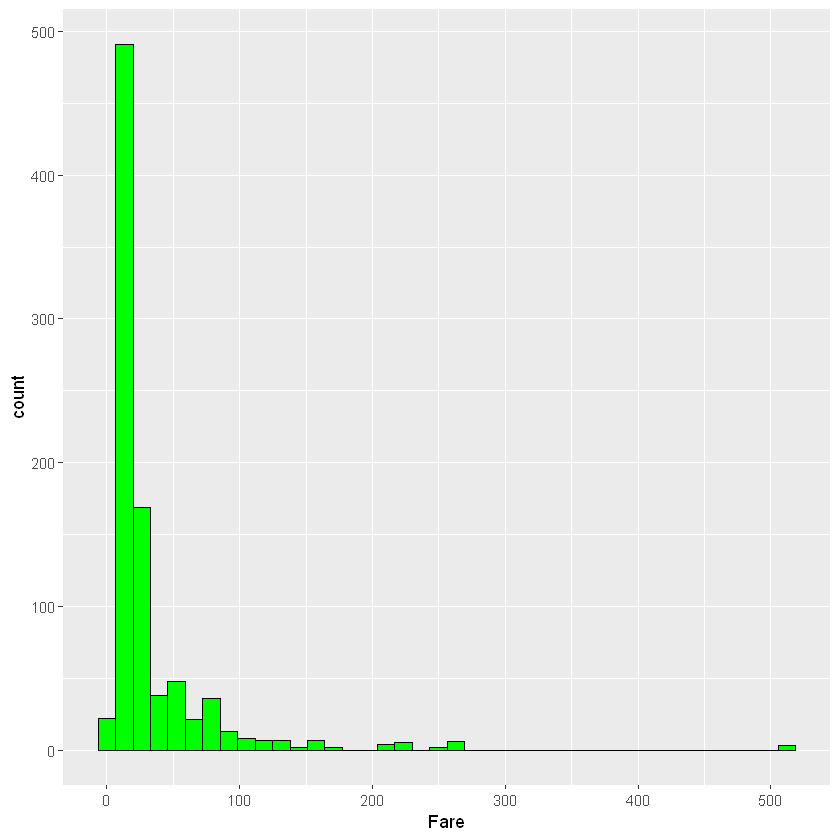

In [14]:
# Plotting the average ticket price per passanger

ggplot(df.train,aes(Fare))+ geom_histogram(bins = 40, fill = 'green', color = 'black')

## Data Cleaning
We want to fill in the missing age data instead of just dropping the missing age data rows. One way to do that is by filling in the mean age of all the passangers (imputation)

However, we can be smarted about this and check the average age by passanger class. For example

Warning message:
"Removed 177 rows containing non-finite values (stat_boxplot)."

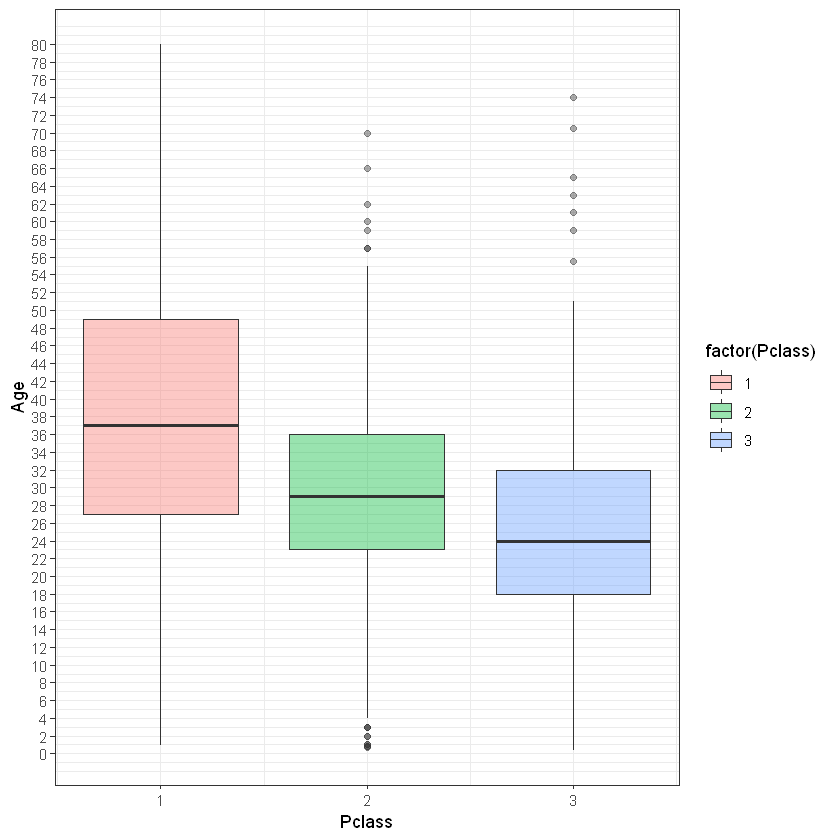

In [15]:
ggplot(df.train, aes(Pclass, Age)) +
geom_boxplot(aes(group = Pclass, fill = factor(Pclass)), alpha = 0.4) +
scale_y_continuous(breaks = seq(min(0),max(80),by= 2))+ theme_bw()


We can see the wealthier passangers in the higher classse tend to be older, which makes sense. We can use these average age values to impute based n Pclass for Age.

In [16]:
## Imputation of Age based on Class

impute_age <- function(age,class){
    out <- age
    for (i in 1:length(age)){
        
        if (is.na(age[i])){

            if (class[i] == 1){
                out[i] <- 37

            }else if (class[i] == 2){
                out[i] <- 29

            }else{
                out[i] <- 24
            }
        }else{
            out[i]<-age[i]
        }
    }
    return(out)
}

In [17]:
fixed.ages <- impute_age(df.train$Age,df.train$Pclass)

df.train$Age <- fixed.ages

Let's check to see if it worked

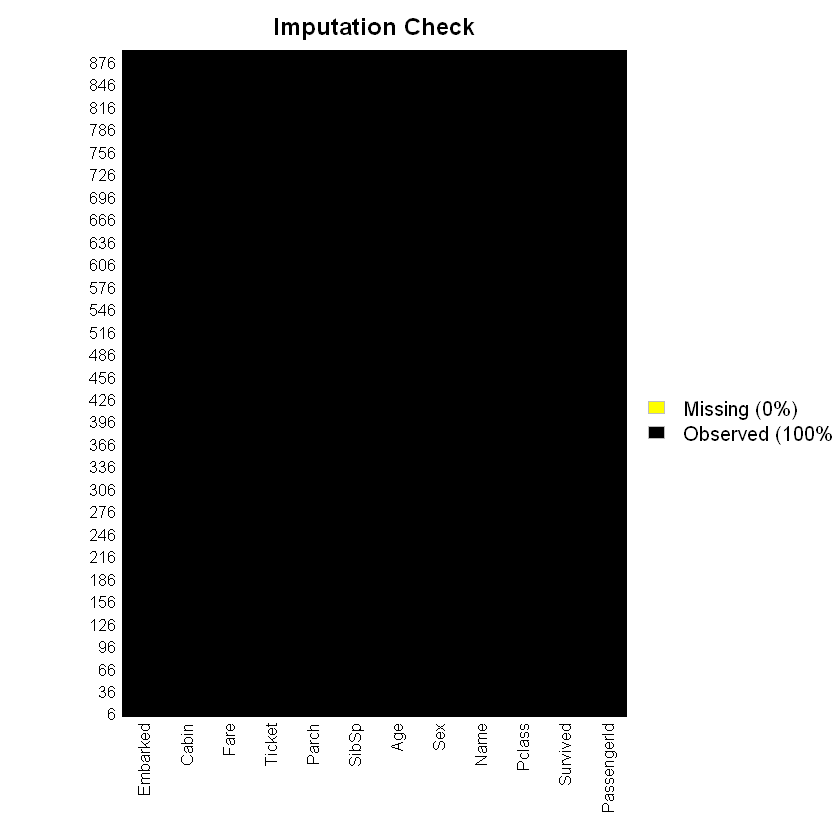

In [18]:
missmap(df.train,main = 'Imputation Check', col = c('yellow', 'black'),legend = T)

It worked! Let's continue with building our model!

## Building a Logistic Regression Model
Now it's time to build our model! Let's begin by doing a final "clean-up " of our data by removing the features that won't be useful to us and make sure the features we will be using are the correct data types.

In [19]:
str(df.train)
head(df.train,1)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S


We can deselect the columns we don't want using dplyrs "select" feature.

In [20]:
df.train <- select(df.train, -PassengerId, -Name, -Ticket, -Cabin)

In [21]:
str(df.train)
head(df.train,1)

'data.frame':	891 obs. of  8 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
,<int>,<int>,<fct>,<dbl>,<int>,<int>,<dbl>,<fct>
1,0,3,male,22,1,0,7.25,S


We will need to factorize all the remaining columns that are non-continuous. This leaves only Age and Fare a number

In [22]:
df.train$Survived <- factor(df.train$Survived)
df.train$Pclass <- factor(df.train$Pclass)
df.train$Parch <- factor(df.train$Parch)
df.train$SibSp <- factor(df.train$SibSp)

In [23]:
str(df.train)

'data.frame':	891 obs. of  8 variables:
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp   : Factor w/ 7 levels "0","1","2","3",..: 2 2 1 2 1 1 1 4 1 2 ...
 $ Parch   : Factor w/ 7 levels "0","1","2","3",..: 1 1 1 1 1 1 1 2 3 1 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


## Training the Model

In [24]:
log.model <- glm(Survived ~. , family = binomial(link = 'logit'), data = df.train)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = df.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8158  -0.6134  -0.4138   0.5808   2.4896  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.845e+01  1.660e+03   0.011 0.991134    
Pclass2     -1.079e+00  3.092e-01  -3.490 0.000484 ***
Pclass3     -2.191e+00  3.161e-01  -6.930 4.20e-12 ***
Sexmale     -2.677e+00  2.040e-01 -13.123  < 2e-16 ***
Age         -3.971e-02  8.758e-03  -4.534 5.79e-06 ***
SibSp1       8.135e-02  2.245e-01   0.362 0.717133    
SibSp2      -2.897e-01  5.368e-01  -0.540 0.589361    
SibSp3      -2.241e+00  7.202e-01  -3.111 0.001862 ** 
SibSp4      -1.675e+00  7.620e-01  -2.198 0.027954 *  
SibSp5      -1.595e+01  9.588e+02  -0.017 0.986731    
SibSp8      -1.607e+01  7.578e+02  -0.021 0.983077    
Parch1       3.741e-01  2.895e-01   1.292 0.196213    
Parch2       3.862e-02  3.824e-01   0.101 0.919560    
Parch3   

Warning message:
"not plotting observations with leverage one:
  679"

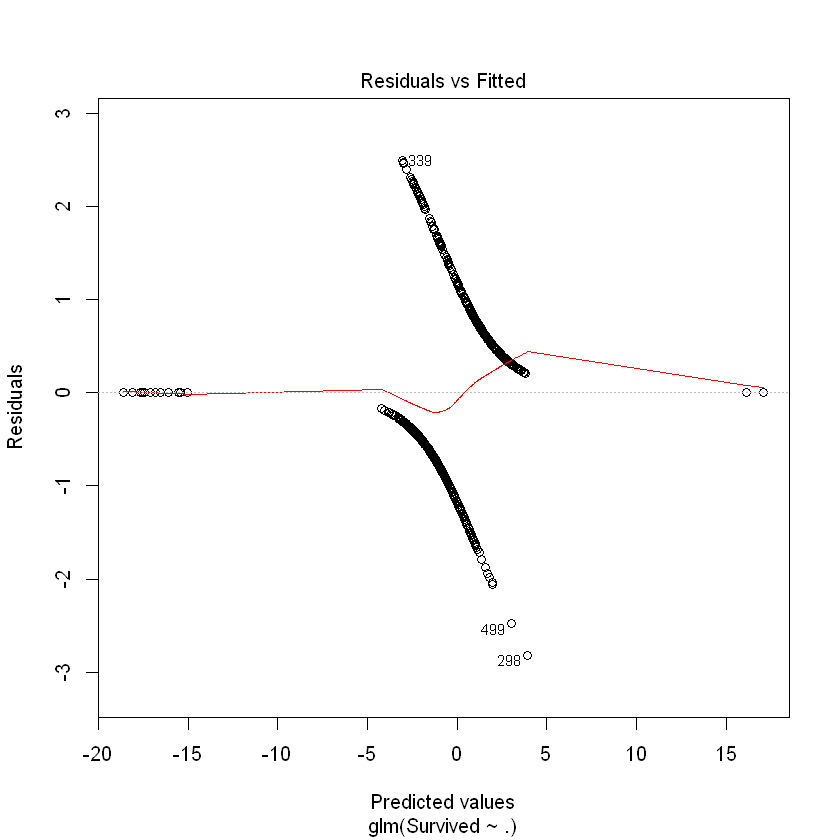

Warning message:
"not plotting observations with leverage one:
  679"

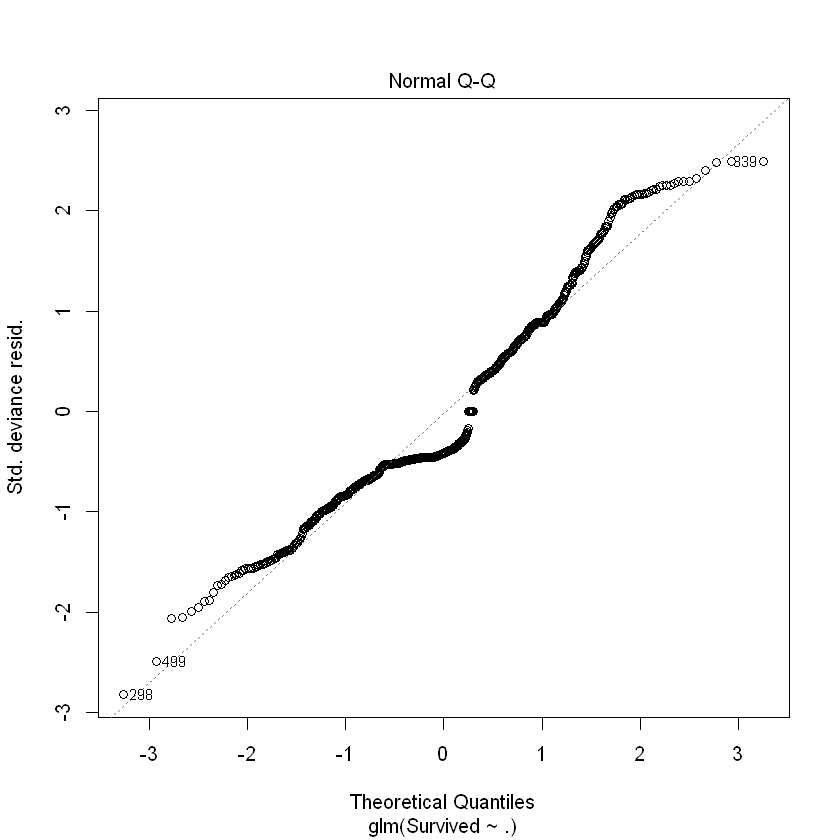

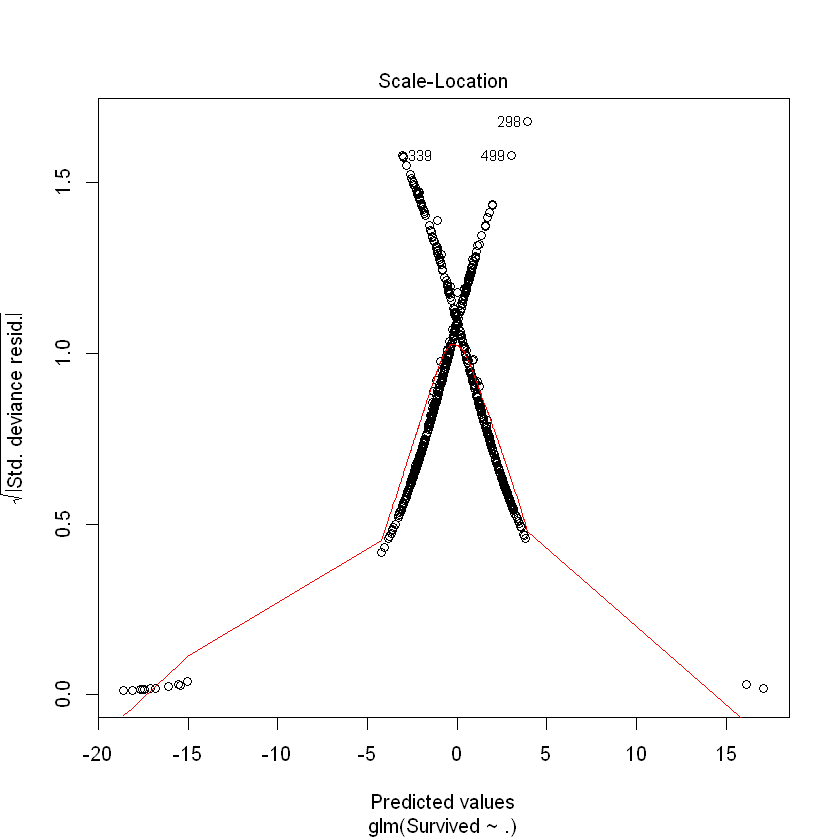

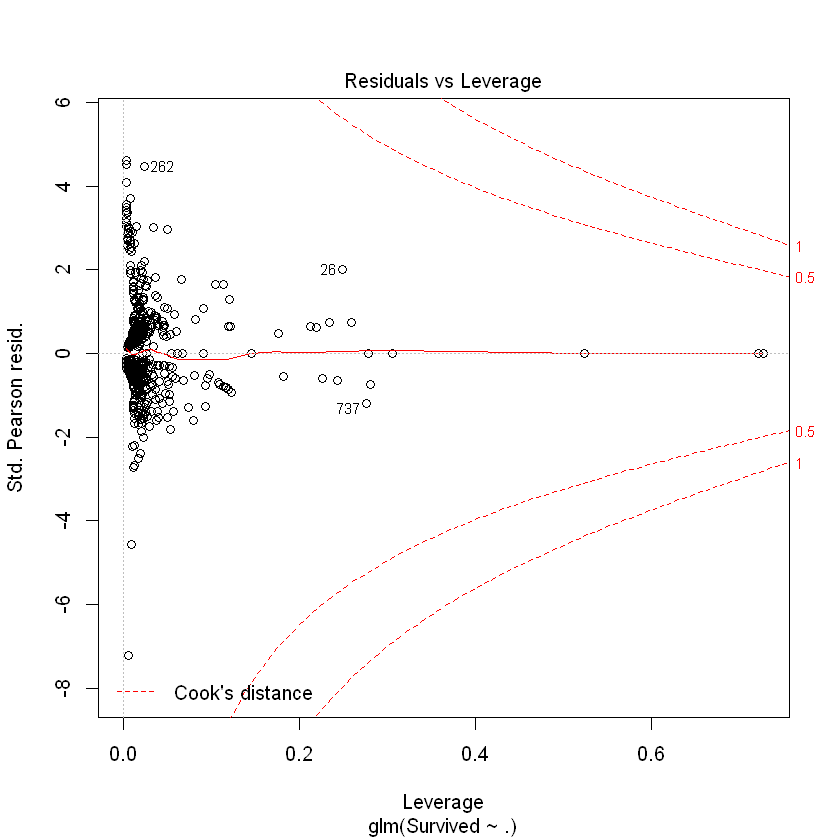

In [25]:
summary(log.model)
plot(log.model)

We can see clearly that Sex,Age, and Class are the most significant features. Which makes sense given the women and children first policy.

## Predicting using Test Cases
Let's make a test set out of our training set, retrain on the smaller version of our training set and check it against the test subset.

In [26]:
library(caTools)
set.seed(101)

split = sample.split(df.train$Survived, SplitRatio = 0.70)

final.train = subset(df.train, split == TRUE)
final.test = subset(df.train, split == FALSE)

Warning message:
"package 'caTools' was built under R version 3.6.3"

Now let's rerun our model on only our final training set:


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = final.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8288  -0.5607  -0.4096   0.6174   2.4898  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.777e+01  2.400e+03   0.007 0.994091    
Pclass2     -1.230e+00  3.814e-01  -3.225 0.001261 ** 
Pclass3     -2.160e+00  3.841e-01  -5.624 1.87e-08 ***
Sexmale     -2.660e+00  2.467e-01 -10.782  < 2e-16 ***
Age         -3.831e-02  1.034e-02  -3.705 0.000212 ***
SibSp1      -2.114e-02  2.755e-01  -0.077 0.938836    
SibSp2      -4.000e-01  6.463e-01  -0.619 0.536028    
SibSp3      -2.324e+00  8.994e-01  -2.584 0.009765 ** 
SibSp4      -1.196e+00  8.302e-01  -1.440 0.149839    
SibSp5      -1.603e+01  9.592e+02  -0.017 0.986666    
SibSp8      -1.633e+01  1.004e+03  -0.016 0.987019    
Parch1       7.290e-01  3.545e-01   2.056 0.039771 *  
Parch2       1.406e-01  4.504e-01   0.312 0.754892    
Parch3

Warning message:
"not plotting observations with leverage one:
  42, 473"

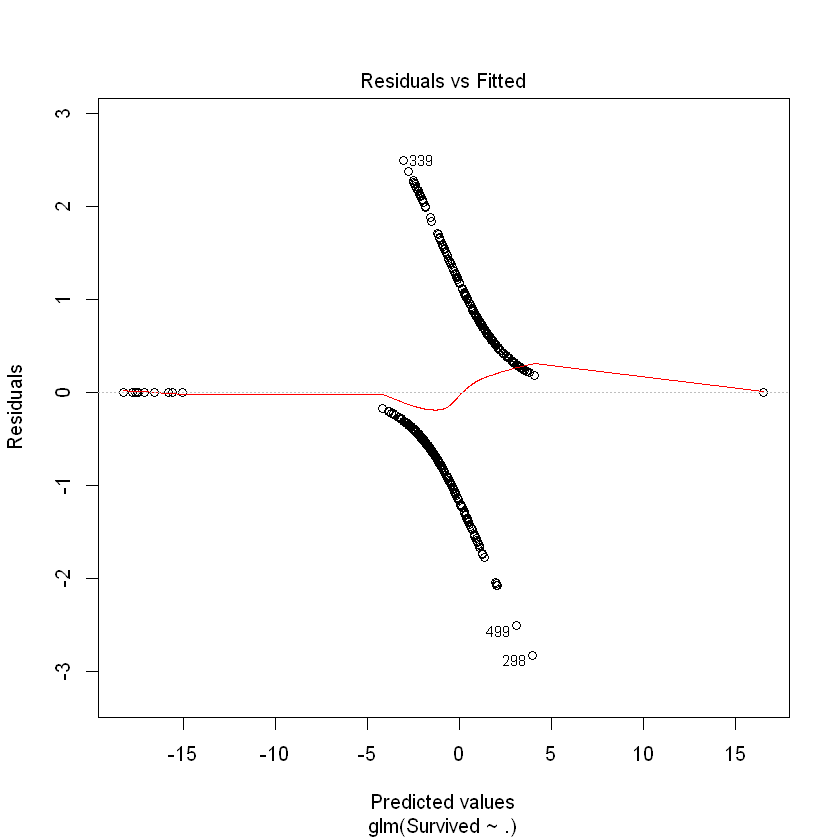

Warning message:
"not plotting observations with leverage one:
  42, 473"

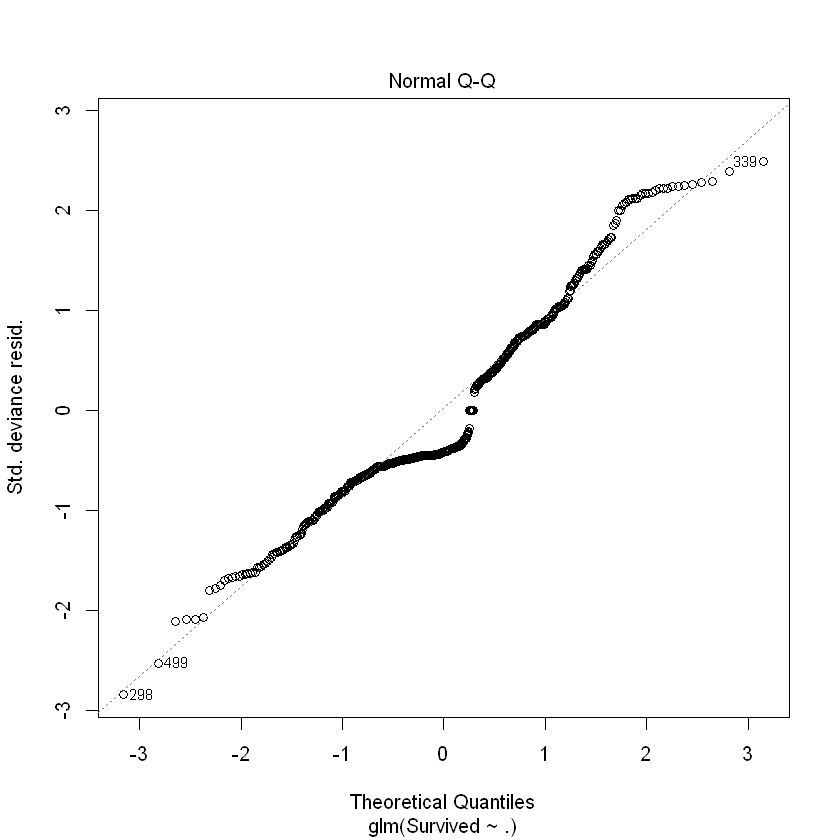

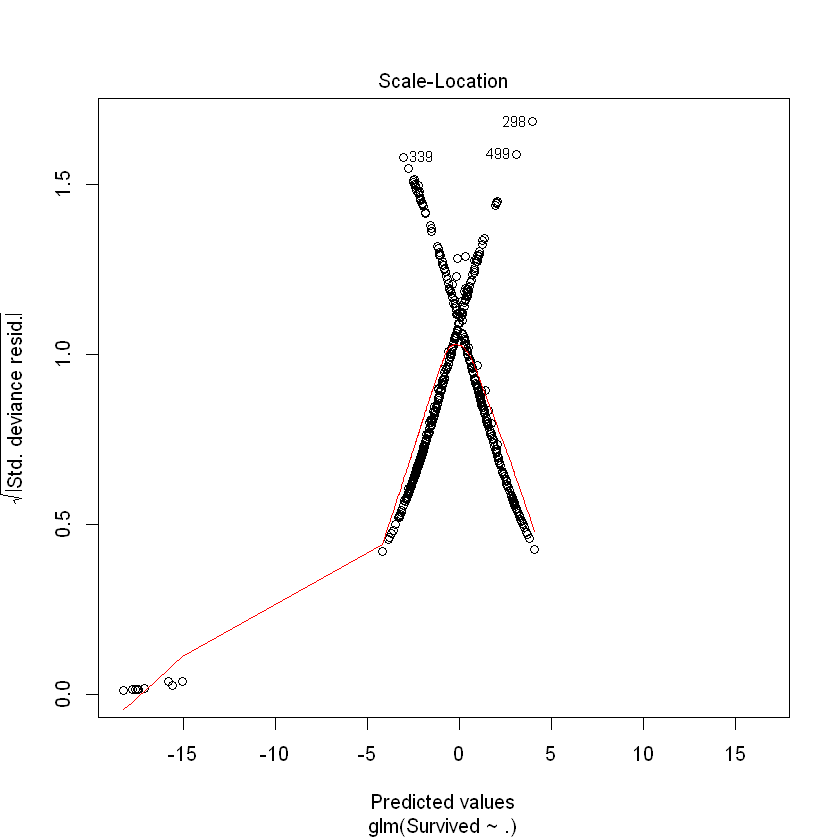

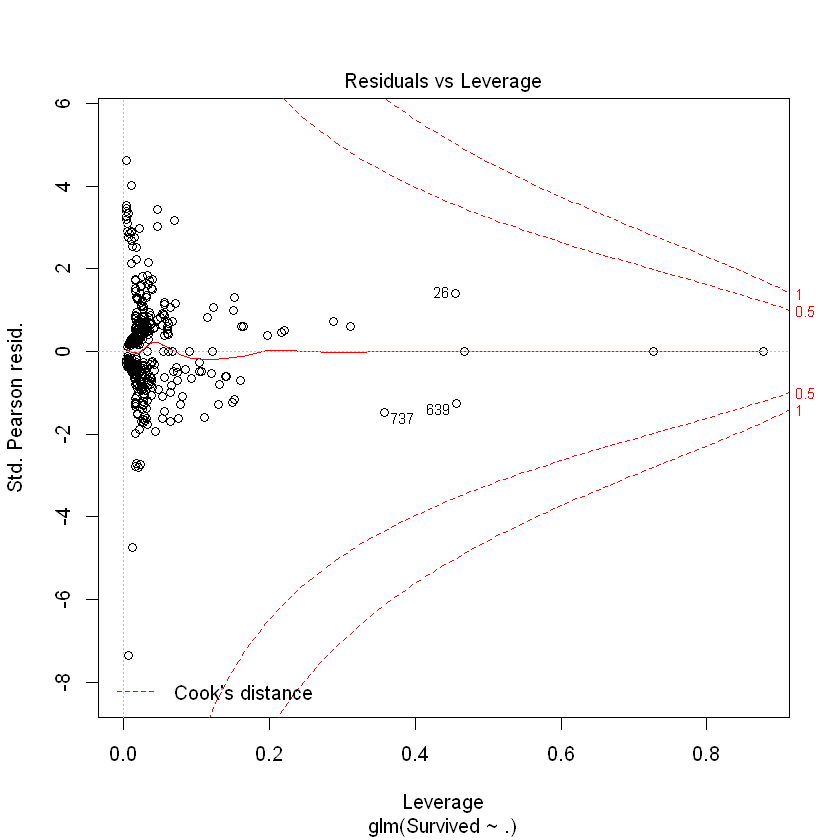

In [27]:
final.log.model <- glm(formula=Survived ~ . , family = binomial(link='logit'),data = final.train)
summary(final.log.model)
plot(final.log.model)

In [28]:
fitted.probabilities <- predict(final.log.model,newdata=final.test,type='response')

fitted.results <- ifelse(fitted.probabilities > 0.5,1,0)
misClasificError <- mean(fitted.results != final.test$Survived)

print(paste('Accuracy',1-misClasificError))

[1] "Accuracy 0.798507462686567"


Looks like we were able to achieve around 80% accuracy, where as random guessing would have just been 50% accuracy. Let's plot the results and see the confusion matrix:

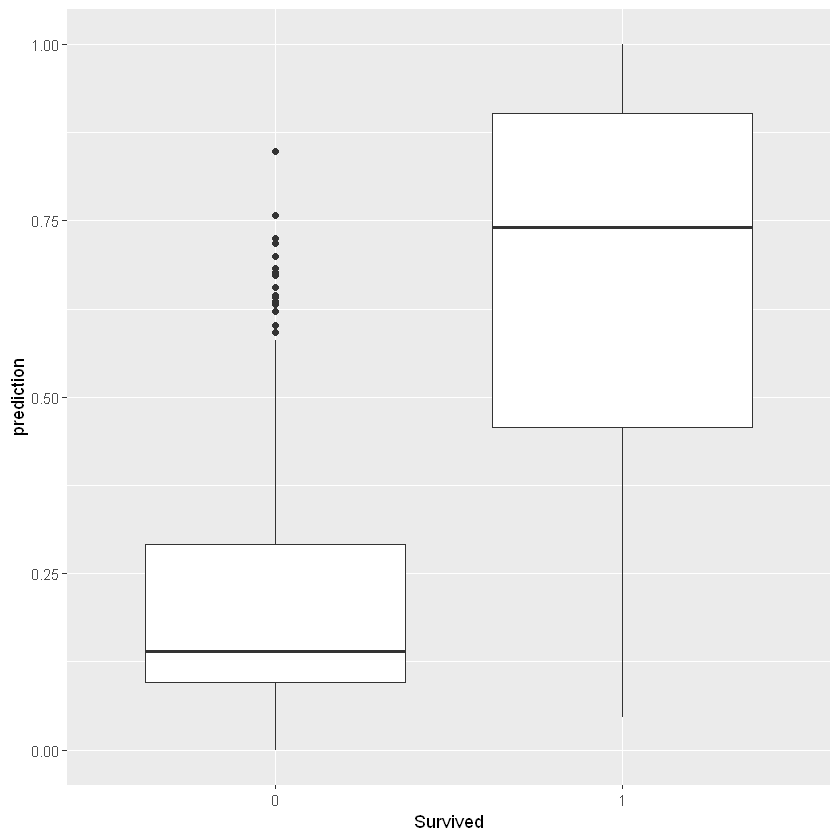

In [29]:
final.test$prediction <- fitted.probabilities

ggplot(data = final.test, aes( x = Survived, y = prediction)) +geom_boxplot()

In [30]:
table(final.test$Survived, fitted.probabilities > 0.5)


   
    FALSE TRUE
  0   140   25
  1    29   74